In [1]:
## Importing necessary files

import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np


In [20]:
file = "chg.aac"
signal,sr = librosa.load(file, sr = 44100)

# Frequency transformation
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0,sr,len(magnitude))


/Users/mihir/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0.5, 1.0, 'fft analysis')

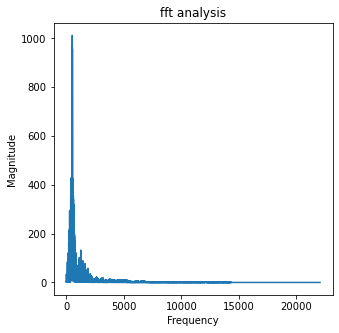

In [21]:

## Cutting out the right part of the graph to make it easy for computations
left_magnitude = magnitude[:int(len(frequency)/2)]
left_frequency = frequency[:int(len(frequency)/2)]

 ## Plotting the graph
plt.figure(figsize = (5,5))
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("fft analysis")

In [22]:

## Scale dict stores frequencies of the of scales
Scales = {
    
    "D" :[73.42,146.83,293.66,587.33,1174.66],
    "D#":[77.78,155.56,311.13,622.25,1244.51],
    "E" :[82.41,164.81,329.63,659.25,1318.51],
    "F" :[87.31,174.61,349.23,698.46,1396.91],
    "F#":[92.50,185.00,369.99,739.99,1479.98],
    "G" :[98.00,196.00,392.00,783.99,1567.98],
    "G#":[103.83,207.65,415.30,830.61,1661.22],
    "A" :[110.00,220.00,440.00,880.00,1760.00],
    "A#":[116.54,233.08,466.16,932.33,1864.66],
    "B" :[123.47,246.94,493.88,987.77,1975.53],
    "C" :[65.41,130.81,261.63,523.25,1046.50],
    "C#":[69.30,138.59,277.18,554.37,1108.73]
}

In [23]:

max_index = np.argwhere(left_magnitude == max(left_magnitude))
fundamental_freq = left_frequency[max_index]
fundamental_freq[0][0] ##fundamental frequency of the sound
##argwhere returns 2d array with single element. [0][0] gives out the no present in array


## List that stores the numerical difference between fundamental freq and freqs present in Scale dict. 
diff = [] 
for i in Scales.keys():
    for j in Scales.get(i):
        diff.append(abs(fundamental_freq[0][0] -j)) 
            
                   

## Finds min of list 
m = min(diff)
    

In [24]:
    
## Code to categorize the frequency into proper scale
    
ind = np.argwhere(diff == m)[0][0] 
p = int((ind+1)/5) ## divide by 5 because each scale has 5 freqs in Scale dict
out_dict={
    0:"D",1:"D#",
    2:"E",3:"F",
    4:"F#",5:"G",
    6:"G#",7:"A",
    8:"A#",9:"B",
    10:"C",11:"C#"   
}

print(out_dict.get(p))

C
